<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Regressor(LDR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install firebase-admin
import firebase_admin
import cv2 
import math
import numpy as np 
from google.colab.patches import cv2_imshow

In [0]:
from firebase_admin import credentials, storage,db 
import pickle

In [0]:
cred = credentials.Certificate('/content/credentials_new.json')

##  only take the part from where the actual name starts
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'location-5f194.appspot.com',
}, name='storage')

In [0]:
s7_hdr=[]
note4_hdr=[]
minote_hdr=[]
PatelNagarMi_hdr=[]
gurgaonNote4_hdr=[]

bucket = storage.bucket(app = app)
blobs = bucket.list_blobs()
ctr=0


## Reading all the LDR images 
for blob in blobs:
  if('s7' in blob.name and 'hdr' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "s7_hdr" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "s7_hdr" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      s7_hdr.append(l) 
      print(name)
  if('note4' in blob.name and 'hdr' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "note4_hdr" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "note4_hdr" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      note4_hdr.append(l)
      print(name)
  if('minote' in blob.name and 'hdr' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "minote_hdr" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "minote_hdr" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      minote_hdr.append(l)
      print(name)
  if('PatelNagarMi' in blob.name and 'hdr' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "PatelNagarMi" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "PatelNagarMi" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      PatelNagarMi_hdr.append(l)
      print(name)
  if('gurgaonNote4' in blob.name and 'hdr' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "gurgaonNote4" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "gurgaonNote4" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      gurgaonNote4_hdr.append(l)
      print(name)

In [82]:
print(len(note4_hdr))
print(len(s7_hdr))
print(len(gurgaonNote4_hdr))
print(len(PatelNagarMi_hdr))
print(len(minote_hdr))

38
84
170
317
98


In [0]:
with open('/content/labels_latestcorrectpakka.bin','rb') as file:
  data = pickle.load(file)
  

In [84]:
print(data)

{'s7_hdr': [['2019-07-28 15:35:33.jpeg', 64], ['2019-07-28 16:04:07.jpeg', 75], ['2019-07-28 16:04:23.jpeg', 75], ['2019-07-28 16:05:31.jpeg', 75], ['2019-07-28 16:38:41.jpeg', 81], ['2019-07-28 16:38:52.jpeg', 81], ['2019-07-28 16:39:31.jpeg', 81], ['2019-07-29 11:49:24.jpeg', 38], ['2019-07-29 11:49:25.jpeg', 38], ['2019-07-29 11:50:38.jpeg', 38], ['2019-07-29 12:23:33.jpeg', 44], ['2019-07-29 12:53:55.jpeg', 64], ['2019-07-29 12:55:27.jpeg', 50], ['2019-07-29 12:55:48.jpeg', 47], ['2019-07-29 13:15:38.jpeg', 38], ['2019-07-29 13:16:22.jpeg', 35], ['2019-07-29 13:16:40.jpeg', 32], ['2019-07-29 13:24:37.jpeg', 38], ['2019-07-29 13:29:44.jpeg', 29], ['2019-07-29 13:42:15.jpeg', 47], ['2019-07-29 13:55:53.jpeg', 35], ['2019-07-29 13:55:54.jpeg', 35], ['2019-07-29 14:00:53.jpeg', 41], ['2019-07-29 14:01:15.jpeg', 44], ['2019-07-29 14:14:22.jpeg', 64], ['2019-07-29 14:14:23.jpeg', 64], ['2019-07-29 14:14:47.jpeg', 63], ['2019-07-29 14:19:09.jpeg', 38], ['2019-07-29 14:19:47.jpeg', 35], ['

In [0]:
l_s7_hdr=[]
l_note4_hdr=[]
l_minote_hdr=[]
l_PatelNagarMi_hdr=[]
l_gurgaonNote4_hdr=[]

l_s7_hdr=data['s7_hdr']
l_note4_hdr=data['note4_hdr']
l_minote_hdr= data['minote_hdr']
l_PatelNagarMi_hdr=data['PatelNagarMi_hdr']
l_gurgaonNote4_hdr=data['gurgaonNote4_hdr']


In [177]:
feat=[]
ctr=0
for img in s7_hdr:
  for l  in l_s7_hdr:
    if(img[0][6:] == l[0]):
      print('s7')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      feat.append(t) 

      
for img in note4_hdr:
  for l  in l_note4_hdr:
    if(img[0][9:] == l[0]):
      print('note4')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
#       feat.append(t) 
    
      
for img in minote_hdr:
  #print(img[0])
  for l  in l_minote_hdr:
    #print(l[0])
    if(img[0][10:] == l[0]):
      print('minote')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      feat.append(t) 
  

for img in PatelNagarMi_hdr:
  #print(img[0])
  for l  in l_PatelNagarMi_hdr:
    #print(l[0])
    if(img[0][12:] == l[0]):
      print('PatelNagar')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      feat.append(t) 
    
for img in gurgaonNote4_hdr:
  for l  in l_gurgaonNote4_hdr:
    if(img[0][12:] == l[0]):
      print('Gurgaon')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      feat.append(t) 



s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
mi

In [0]:
for val in feat:
  print(val[1])
  print('\t')
  print(val[2])
  print('\t')
  print(val[3])

In [0]:
cred = credentials.Certificate('/content/credentials_weather.json')

# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://celestini-bd493.firebaseio.com/'
})

In [0]:
    
ref = db.reference()
df = ref.get()


In [185]:
temp_weather = {}

for key in df:
  try:
    l=[]
    l.append(df[key]['main']['humidity'])
    l.append(df[key]['main']['pressure'])
    l.append(df[key]['main']['temp'])
    l.append(df[key]['visibility'])
    l.append(df[key]['wind']['deg'])
    l.append(df[key]['wind']['speed'])
    l.append(df[key]['clouds']['all'])
    k = df[key]['weather'][0]['description']
    if(k=='haze'):
      l.append(0)
    elif(k=='mist'):
      l.append(1)
    elif(k=='drizzle'):
      l.append(2)
    elif(k=='dust'):
      l.append(3)
    temp_weather[key]=l
  except:
    print(key)
    

02-08-2019 24:49:49
02-08-2019 24:54:49
07-08-2019 07:57:31
07-08-2019 08:02:31
07-08-2019 08:07:31
07-08-2019 08:12:31
07-08-2019 08:17:31
07-08-2019 08:22:31
07-08-2019 08:27:31
07-08-2019 08:32:31
07-08-2019 08:37:31
07-08-2019 08:42:31
07-08-2019 08:47:31
07-08-2019 08:57:00
09-08-2019 05:41:06
09-08-2019 05:46:06
09-08-2019 05:51:06
09-08-2019 05:56:06
09-08-2019 06:01:06
09-08-2019 06:06:06
09-08-2019 06:11:06
09-08-2019 06:16:06
09-08-2019 06:21:06
09-08-2019 06:26:06
09-08-2019 06:31:06
10-08-2019 02:30:04
10-08-2019 02:35:04
10-08-2019 02:40:04
10-08-2019 02:45:04
10-08-2019 02:50:04
10-08-2019 02:55:04
25-07-2019 02:44:11
25-07-2019 02:49:11
25-07-2019 02:54:11
25-07-2019 02:59:11
25-07-2019 03:04:11
25-07-2019 03:09:11
25-07-2019 03:14:11
25-07-2019 03:19:11
25-07-2019 03:24:11
25-07-2019 03:29:11
29-07-2019 23:00:27
29-07-2019 23:05:27
29-07-2019 23:10:27
29-07-2019 23:15:27
29-07-2019 23:20:27
29-07-2019 23:25:27
29-07-2019 23:30:27
29-07-2019 24:55:27
30-07-2019 01:00:27


In [0]:
feat_a=[]
for val in feat:
  #print(val[0])
  temp = val[0] 
  #print(temp)
  temp=temp.split('-')
  #print(temp)
  newtemp=temp[2].split(' ')
  #print(newtemp)
  newesttemp=newtemp[1].split(':')
  #print(newesttemp)
  j=int(newesttemp[1])
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l=[]
  l.append(final)
  l.append(val[1])
  l.append(val[2])
  l.append(val[3])
  l.append(val[4])
  feat_a.append(l)


In [205]:
print(feat_a)

[['28-07-2019 15:30', 37.22678756713867, 68.88191754275347, 2, 64], ['28-07-2019 16:00', 47.065059661865234, 62.23692343120335, 2, 75], ['28-07-2019 16:00', 53.23287582397461, 67.0993693452088, 2, 75], ['28-07-2019 16:00', 53.76498031616211, 66.73995429495821, 1, 75], ['28-07-2019 16:45', 43.83427810668945, 70.27018565185803, 1, 81], ['28-07-2019 16:45', 46.913997650146484, 60.21520043288193, 1, 81], ['28-07-2019 16:45', 45.037010192871094, 77.7040221415209, 1, 81], ['29-07-2019 11:45', 39.126556396484375, 56.61344348303906, 2, 38], ['29-07-2019 11:45', 37.33599090576172, 70.44397925839516, 1, 38], ['29-07-2019 11:45', 41.33512878417969, 59.23516075411799, 2, 38], ['29-07-2019 12:30', 47.936737060546875, 73.38764829963526, 2, 44], ['29-07-2019 12:00', 45.23759078979492, 82.70619020244611, 1, 64], ['29-07-2019 12:00', 44.692543029785156, 44.481475070451474, 2, 50], ['29-07-2019 12:00', 44.46748352050781, 69.70346879937786, 2, 47], ['29-07-2019 13:15', 36.37445831298828, 56.4492085030899

In [0]:
weather={}
for key in temp_weather:
  temp=key.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  if(j<=7.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  if(final not in weather):
    weather[final]=temp_weather[key]
 


In [219]:
print(len(weather))

1893


In [0]:
trans=[]
cont=[]
ent=[]
hours=[]
hum=[]
pressure=[]
tempr=[]
deg=[]
speed=[]


pm=[]

## COMBINING 1ST 4 LOCATIONS DATA 
for e in feat_a:
  hours.append(float(e[0][-5:-3]))
  pm.append(float(e[4]))
  trans.append(e[3])
  ent.append(float(e[1]))
  cont.append(float(e[2]))
  for w in weather:
    if(e[0] == w):
      hum.append(float(weather[w][0]))
      pressure.append(float(weather[w][1]))
      tempr.append(float(weather[w][2])) 
      deg.append(float(weather[w][4]))
      speed.append(float(weather[w][5]))
      

In [223]:
print(len(trans))
print(len(hours))
print(len(cont))
print(len(ent))
print(len(hum))
print(len(pressure))
print(len(tempr))
print(len(deg))
print(len(speed))
print(len(pm))

451
451
451
451
451
451
451
451
451
451


In [224]:
print(trans)
print(hours)
print(cont)
print(ent)
print(hum)
print(pressure)
print(tempr)
print(deg)
print(speed)
print(pm)

[2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

Features And Labels 

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor

In [0]:
final_shape=len(hours)

#FEATURES 


trans= np.reshape(trans,(final_shape,1))
hours = np.reshape(hours,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
hum = np.reshape(hum,(final_shape,1))
pressure = np.reshape(pressure,(final_shape,1))
tempr = np.reshape(tempr,(final_shape,1))
deg = np.reshape(deg,(final_shape,1))
speed = np.reshape(speed,(final_shape,1))

#LABELS
pm = np.reshape(pm,(final_shape,1))


# SCALING 

s1 = MinMaxScaler()
hours = s1.fit_transform(hours)
s2 = MinMaxScaler()
cont = s2.fit_transform(cont)
s3 = MinMaxScaler()
ent = s3.fit_transform(ent)
s4 = MinMaxScaler()
hum = s4.fit_transform(hum)
s5 = MinMaxScaler()
pressure = s5.fit_transform(pressure)
s6 = MinMaxScaler()
tempr = s6.fit_transform(tempr)
s7 = MinMaxScaler()
deg = s7.fit_transform(deg)
s8 = MinMaxScaler()
speed = s8.fit_transform(speed)


features = np.hstack((hours,cont, ent, hum, pressure, tempr, deg, speed))




In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size=0.3, random_state = 42)
reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)


In [228]:
print(x_test)

[[1.         0.44115385 0.74122907 ... 0.80743243 0.15151515 0.21153846]
 [0.75       0.51293751 0.942072   ... 0.74493243 0.21212121 0.21153846]
 [0.25       0.18082508 0.32965495 ... 0.31587838 0.24242424 0.        ]
 ...
 [0.66666667 0.35643536 0.62585198 ... 0.42060811 0.27272727 0.5       ]
 [0.66666667 0.22300777 0.67462447 ... 0.66216216 0.09090909 0.5       ]
 [0.41666667 0.48641151 0.65711447 ... 0.57939189 0.27272727 0.90384615]]


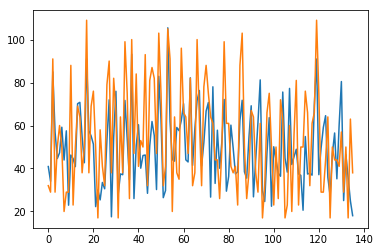

In [229]:
plt.plot(pred)
plt.plot(y_test)

In [231]:
print(mean_squared_error(y_test,pred)**0.5)

20.2656591008652


In [235]:
for i in range(len(pred)):
  print(str(y_test[i]) + '\t' + str(pred[i]))

[32.]	[40.91184804]
[29.]	[34.04055076]
[91.]	[84.95821693]
[29.]	[56.96299351]
[50.]	[44.65095001]
[60.]	[47.30355703]
[50.]	[59.21202403]
[20.]	[43.94371924]
[29.]	[57.52370912]
[29.]	[22.92284626]
[88.]	[46.26409058]
[23.]	[44.61557362]
[50.]	[40.87556585]
[69.]	[70.17099715]
[64.]	[70.78978875]
[38.]	[54.75690166]
[50.]	[42.67180527]
[109.]	[91.02291999]
[38.]	[57.60360418]
[69.]	[55.13885911]
[76.]	[51.32643181]
[50.]	[22.25904503]
[17.]	[30.012046]
[58.]	[25.39234229]
[41.]	[33.50494521]
[32.]	[30.5622307]
[79.]	[53.04991687]
[90.]	[71.96331456]
[38.]	[17.51811291]
[82.]	[54.56913205]
[66.]	[75.93657661]
[17.]	[28.10054474]
[64.]	[37.47203512]
[38.]	[37.10768011]
[99.]	[71.6783421]
[75.]	[53.86211597]
[26.]	[34.79037159]
[100.]	[93.17345624]
[47.]	[26.00093267]
[84.]	[50.77605984]
[41.]	[60.37501422]
[53.]	[40.14157645]
[50.]	[46.04806105]
[93.]	[46.27561442]
[32.]	[28.44979657]
[81.]	[50.59461907]
[87.]	[61.87462233]
[82.]	[55.35572362]
[47.]	[30.20132529]
[103.]	[82.89335728]
[

In [0]:
random_reg = RandomForestRegressor()
random_reg.fit(x_train, y_train)
predr = random_reg.predict(x_test)
plt.plot(pred)
plt.plot(y_test)
print(mean_squared_error(y_test,pred)**0.5)

In [240]:
for i in range(len(predr)):
  print(str(y_test[i]) + '\t' + str(predr[i]) )

[32.]	56.3
[29.]	46.7
[91.]	80.8
[29.]	30.5
[50.]	20.6
[60.]	58.3
[50.]	50.0
[20.]	18.2
[29.]	30.5
[29.]	42.5
[88.]	47.0
[23.]	38.3
[50.]	31.1
[69.]	68.2
[64.]	66.8
[38.]	40.4
[50.]	61.9
[109.]	105.2
[38.]	38.0
[69.]	79.8
[76.]	52.8
[50.]	42.2
[17.]	16.1
[58.]	35.6
[41.]	54.0
[32.]	39.9
[79.]	71.0
[90.]	95.0
[38.]	34.4
[82.]	75.4
[66.]	56.2
[17.]	17.9
[64.]	59.4
[38.]	35.8
[99.]	103.7
[75.]	83.9
[26.]	23.0
[100.]	104.4
[47.]	39.6
[84.]	52.6
[41.]	46.3
[53.]	44.6
[50.]	49.5
[93.]	51.1
[32.]	26.0
[81.]	52.8
[87.]	58.3
[82.]	75.4
[47.]	36.2
[103.]	79.4
[75.]	74.9
[32.]	29.0
[41.]	36.4
[105.]	97.1
[91.]	76.2
[20.]	26.0
[64.]	52.3
[38.]	33.5
[35.]	25.1
[96.]	74.1
[66.]	67.6
[64.]	50.7
[47.]	32.9
[82.]	82.1
[32.]	45.2
[38.]	60.9
[100.]	100.3
[63.]	56.0
[32.]	45.2
[78.]	78.1
[88.]	80.2
[75.]	53.3
[64.]	43.7
[61.]	56.0
[44.]	49.6
[44.]	33.2
[26.]	42.8
[50.]	50.0
[99.]	95.0
[61.]	37.2
[61.]	61.5
[41.]	43.5
[38.]	40.8
[41.]	36.5
[23.]	32.9
[88.]	76.2
[103.]	103.7
[50.]	44.9
[26.]	26.6
[38.]	40.4

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
    
  return (-1 * ent[0])

In [0]:
def trans_deg(im):
#   im = cv2.imread(img)
#   im = cv2.resize(im, (256,256))
  B=np.zeros((256,256))
  D=np.zeros((256,256))
  C=np.zeros((256,256))
  # 3rd channel or im[2] has been split as b,g,r 

  b,g,r = cv2.split(im)

  for i in range(b.shape[0]):
    for j in range(b.shape[1]):
      D[i][j] = min(b[i][j], g[i][j], r[i][j])
      B[i][j] = max(b[i][j], g[i][j], r[i][j])
      C[i][j] = B[i][j] - D[i][j]

  d = np.sum(D)/float(np.size(D))
  b = np.sum(B)/float(np.size(B))
  c = b-d 
  A = (0.33)*max(np.ndarray.flatten(B)) + (0.66)*b
  
  x1=((A - d)/float(A)) 
  x2=(c/float(A))
  u = 10.127489
  v= -8.336512
  s = 0.13606234
  
  w = math.exp(-0.5*(u*x1 + v*x2)+s)
  
  if(w<=0.1):
      w=0
  elif(w<=0.3):
    w=1
  elif(w<=0.5):
    w=2
  elif(w<=0.7):
    w=3
  elif(w<=0.8):
    w=4
  elif(w<=0.9):
    w=5
    
  return w